<a href="https://colab.research.google.com/github/DenisOgr/kaggle-experiments/blob/master/Pytorch60min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

### Getting data


In [120]:

traiset = torchvision.datasets.CIFAR10('./data', train=True, transform=transform, download=True)
trainload = torch.utils.data.DataLoader( traiset, batch_size=4,shuffle=True)

testset = torchvision.datasets.CIFAR10('./data', train=False, transform=transform, download=True)
testload = torch.utils.data.DataLoader( testset, batch_size=4,shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainiter = iter(trainload)
testiter = iter(testload)

In [0]:
tr_images, tr_labels = trainiter.next()
ts_images, ts_labels = testiter.next()

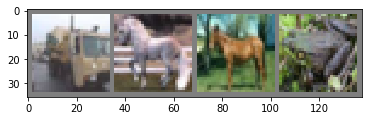

['truck', 'horse', 'horse', 'frog']


In [126]:
imshow(torchvision.utils.make_grid(tr_images))
print([classes[l] for l in tr_labels])

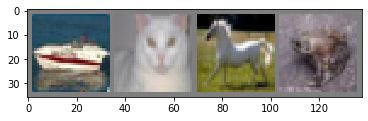

['ship', 'cat', 'horse', 'frog']


In [127]:
imshow(torchvision.utils.make_grid(ts_images))
print([classes[l] for l in ts_labels])

### Build model

In [0]:
class Net(nn.Module):
  def __init__(self):
     super(Net, self).__init__()
     self.conv1 = nn.Conv2d(3,6,5)
     self.pool1 = nn.MaxPool2d(2,2)
     self.conv2 = nn.Conv2d(6,16,5)
     
     self.f1 = nn.Linear(16*5*5,120)
     self.f2 = nn.Linear(120,84)
     self.f3 = nn.Linear(84,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.relu(self.conv2(x))
    x = self.pool1(x)
    x = x.view(-1, 16*5*5)
    x = F.relu(self.f1(x))
    x = F.relu(self.f2(x))
    return self.f3(x)
  

### Greating NN, loss, optim and run training

In [0]:
net = Net()
loss_func = nn.CrossEntropyLoss()
optimazer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [152]:
print_step=2000
for epoch in range(2):
  cum_loss = 0.0
  for i, batch in enumerate(traiload):
    images, labels = batch
    optimazer.zero_grad()
    
    predict = net(images) 
    loss = loss_func(predict, labels)
    
    loss.backward()
    optimazer.step()

    cum_loss += loss.item()
    if i % print_step == 1999:
      print("[%d %5d] loss: %.3f"%(epoch+1, i+1,cum_loss/print_step))
      cum_loss = 0.


[1  2000] loss: 2.272
[1  4000] loss: 1.961
[1  6000] loss: 1.746
[1  8000] loss: 1.609
[1 10000] loss: 1.558
[1 12000] loss: 1.469
[2  2000] loss: 1.402
[2  4000] loss: 1.377
[2  6000] loss: 1.363
[2  8000] loss: 1.328
[2 10000] loss: 1.286
[2 12000] loss: 1.274


In [139]:
labels.shape, predict.shape

(torch.Size([4]), torch.Size([4, 10]))

### Save NN

In [154]:
PATH = './model/cifar1.pth'
torch.save(net.state_dict, PATH)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### Testing

In [0]:
all_images = 0
positive_images = 0
for batch in testload:
  images, labels = batch
  with torch.no_grad():
    predict = net(images)
    pr_labels = torch.argmax(predict, 1)
    positive_labels = (labels == pr_labels).sum()
    all_images += images.shape[0]
    positive_images += positive_labels


In [158]:
print("Acc: %.f"%(100* positive_images/all_images))

Acc: 54
